## Exp1 quantification evaluation (using individualy searched runs normalization turned off)

**related to v2**

In [1]:
#Importing packages 
import pandas as pd 
import numpy as np
import os 
import glob
import re
import seaborn as sns
import matplotlib.pyplot as plt
import umap
import statsmodels.formula.api as smf
from scipy import stats
from scipy.stats import mstats
import dask.dataframe as dd
sns.set_style("ticks")

myColors = ["#7400b8","#6930c3","#5e60ce","#5390d9","#4ea8de","#48bfe3","#56cfe1","#64dfdf","#72efdd","#80ffdb"]

/Users/valdemaras/Programs/miniconda/miniconda3/lib/python3.9/site-packages/statsmodels/compat/pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [2]:
#Set the path 
path = "data/Exp1/Exp1_noNorm_reports"
#Get all the files in the path
all_files = [file for file in os.listdir(path) if file.endswith(".tsv")]

#Set empty list for the dataframes
dfs = []

#iterate the dataframes and append them to the list
for file in all_files:
    file_path = os.path.join(path, file)
    df = pd.read_csv(file_path, sep = "\t", decimal = ",")
    dfs.append(df)

df = pd.concat(dfs, ignore_index=True)

In [3]:
#Drop some uneccessary columns
data = df.iloc[:,0:21].drop_duplicates()
len(data['R.FileName'].unique()) == 95

True

In [4]:
#Extracting the required information from the file name
data['Load'] =  data.iloc[:,0].str.extract(r'test1_(.*?)_')[0].values
#Need to replace some different naming conventions
data['Load'] = data.Load.str.replace('0p25ng', '250pg')
data['Load'] = data.Load.str.replace('0p5ng', '500pg')


data['IT'] =  data.iloc[:,0].str.extract(r'100ms_(.*?)_')[0].values
data['Window'] =  data.iloc[:,0].str.extract(r'IT_(.*?)_')[0].values
data['FAIMS'] = data.iloc[:,0].str.contains(r'FAIMS')
data['Replicate'] =  data['R.FileName'].str.extract(r'g_(.)$') 

data

,R.FileName,PG.ProteinGroups,PG.Quantity,PEP.GroupingKey,PEP.MS1Quantity,PEP.MS2Quantity,PEP.UsedForProteinGroupQuantity,EG.PrecursorId,EG.Qvalue,EG.DatapointsPerPeak (MS1),...,EG.UsedForPeptideQuantity,EG.Cscore,EG.IntCorrScore,EG.Noise,EG.NormalizedCscore,Load,IT,Window,FAIMS,Replicate
0,20240109_OM_JW_Vanquish_uPAC_DIA_240k_100ms_24...,A0A0B4J2D5;P0DPI2,10481.043945,NLSTFAVDGK,21119.445312,916.826294,True,_NLSTFAVDGK_.2,3.154560e-09,8,...,True,42.159706,0.892593,6034.188477,42.146940,10ng,24msIT,27p2mz,True,1
6,20240109_OM_JW_Vanquish_uPAC_DIA_240k_100ms_24...,A0A0B4J2D5;P0DPI2,10481.043945,EVVEAHVDQK,8451.308594,324.072052,True,_EVVEAHVDQK_.2,3.219378e-10,9,...,True,45.421310,0.939859,452.321228,45.410980,10ng,24msIT,27p2mz,True,1
12,20240109_OM_JW_Vanquish_uPAC_DIA_240k_100ms_24...,A0A0B4J2D5;P0DPI2,10481.043945,PIGLCCIAPVLAAK,1229.856445,28.596546,True,_PIGLC[Carbamidomethyl (C)]C[Carbamidomethyl (...,2.914800e-08,4,...,True,38.544609,0.872753,265.415771,38.529143,10ng,24msIT,27p2mz,True,1
18,20240109_OM_JW_Vanquish_uPAC_DIA_240k_100ms_24...,A0A0B4J2F0,5601.521973,MQLVQESEEK,5601.521973,258.232086,True,_MQLVQESEEK_.2,1.504566e-07,6,...,True,35.661480,0.445473,788.353455,35.643861,10ng,24msIT,27p2mz,True,1
24,20240109_OM_JW_Vanquish_uPAC_DIA_240k_100ms_24...,A0AV96;A0AV96-2,1778.335938,ELNNYEIRPGR,3067.013916,135.096664,True,_ELNNYEIRPGR_.3,5.337738e-10,6,...,True,44.733212,0.717804,1519.216553,44.722368,10ng,24msIT,27p2mz,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8864455,20240109_OM_JW_Vanquish_uPAC_DIA_240k_100ms_24...,Q9Y6Y8,295.396240,IDENYSLPTCK,232.207977,11.235553,False,_IDENYSLPTC[Carbamidomethyl (C)]K_.2,9.193077e-19,5,...,True,46.553062,0.687997,82.148270,46.552592,1ng,24msIT,27p2mz,True,3
8864461,20240109_OM_JW_Vanquish_uPAC_DIA_240k_100ms_24...,Q9Y6Y8,295.396240,DMASLPSESNEPK,210.100082,25.762753,False,_DMASLPSESNEPK_.2,2.875842e-17,6,...,True,45.065254,0.965427,66.747643,45.064729,1ng,24msIT,27p2mz,True,3
8864467,20240109_OM_JW_Vanquish_uPAC_DIA_240k_100ms_24...,Q9Y6Y8,295.396240,YDVYLYDR,126.422729,8.162112,False,_YDVYLYDR_.2,4.276466e-08,3,...,True,31.757767,0.888651,102.303230,31.756748,1ng,24msIT,27p2mz,True,3
8864473,20240109_OM_JW_Vanquish_uPAC_DIA_240k_100ms_24...,Q9Y6Y8,295.396240,SIIECVDDFR,23.837973,1.162101,False,_SIIEC[Carbamidomethyl (C)]VDDFR_.2,1.550923e-05,2,...,True,14.046749,0.703589,58.627941,14.045075,1ng,24msIT,27p2mz,True,3


In [5]:
#data.to_csv('data/Exp1/output/Exp1_full_data.txt', sep = "\t")

### Evaluate the CVs

In [6]:
#Filtering for Qvalue bellow 0.1%
#df = df[df['EG.Qvalue'] < 0.001]
#df.columns

In [7]:
#Calculate the CVs for each condition

means_ms1 = data.groupby(['Load','IT','Window','FAIMS', 'PEP.GroupingKey'])['PEP.MS1Quantity'].apply(lambda x: np.mean(x)).reset_index()
means_ms2 = data.groupby(['Load','IT','Window','FAIMS', 'PEP.GroupingKey'])['PEP.MS2Quantity'].apply(lambda x: np.mean(x)).reset_index()

std_ms1 = data.groupby(['Load','IT','Window','FAIMS', 'PEP.GroupingKey'])['PEP.MS1Quantity'].apply(lambda x: np.std(x)).reset_index()
std_ms2 = data.groupby(['Load','IT','Window','FAIMS', 'PEP.GroupingKey'])['PEP.MS2Quantity'].apply(lambda x: np.std(x)).reset_index()

cv_ms1 = data.groupby(['Load','IT','Window','FAIMS', 'PEP.GroupingKey'])['PEP.MS1Quantity'].apply(lambda x: np.std(x)/np.mean(x)).reset_index()
cv_ms2 = data.groupby(['Load','IT','Window','FAIMS', 'PEP.GroupingKey'])['PEP.MS2Quantity'].apply(lambda x: np.std(x)/np.mean(x)).reset_index()

In [8]:
merged_df = pd.merge(means_ms1, means_ms2, on=['Load', 'IT', 'Window', 'FAIMS', 'PEP.GroupingKey'])
merged_df = merged_df.merge(std_ms1, on=['Load', 'IT', 'Window', 'FAIMS', 'PEP.GroupingKey'])
merged_df = merged_df.merge(std_ms2, on=['Load', 'IT', 'Window', 'FAIMS', 'PEP.GroupingKey'])
merged_df = merged_df.merge(cv_ms1, on=['Load', 'IT', 'Window', 'FAIMS', 'PEP.GroupingKey'])
merged_df = merged_df.merge(cv_ms2, on=['Load', 'IT', 'Window', 'FAIMS', 'PEP.GroupingKey'])
merged_df.columns = ['Load', 'IT', 'Window', 'FAIMS', 'PEP.GroupingKey', 'Mean_MS1', 'Mean_MS2', 'Std_MS1', 'Std_MS2', 'CV_MS1', 'CV_MS2']

#Adding a log transform 
merged_df['Log2_MS1'] = np.log2(merged_df['Mean_MS1'])
merged_df['Log2_MS2'] = np.log2(merged_df['Mean_MS2'])
merged_df

,Load,IT,Window,FAIMS,PEP.GroupingKey,Mean_MS1,Mean_MS2,Std_MS1,Std_MS2,CV_MS1,CV_MS2,Log2_MS1,Log2_MS2
0,10ng,12msIT,13p6mz,False,AAAAAAAAAAGAAGGR,35170.230469,3114.384196,508.741679,73.041337,0.014465,0.023453,15.102067,11.604731
1,10ng,12msIT,13p6mz,False,AAAAAAAAAPAAAATAPTTAATTAATAAQ,12474.990560,764.675456,1957.732929,24.650441,0.156933,0.032236,13.606751,9.578704
2,10ng,12msIT,13p6mz,False,AAAAAAALQAK,609159.458333,45801.212240,4316.963299,217.502103,0.007087,0.004749,19.216460,15.483098
3,10ng,12msIT,13p6mz,False,AAAAAAGAGPEMVR,16254.044271,1429.937052,868.494212,21.400121,0.053432,0.014966,13.988511,10.481736
4,10ng,12msIT,13p6mz,False,AAAAAAGEAR,14369.181315,762.508382,1267.159436,43.519526,0.088186,0.057074,13.810690,9.574609
...,...,...,...,...,...,...,...,...,...,...,...,...,...
493854,500pg,6msIT,6p8mz,True,YYTLNGSK,1092.439901,81.202194,12.925408,20.935016,0.011832,0.257813,10.093338,6.343447
493855,500pg,6msIT,6p8mz,True,YYTSASGDEMVSLK,1154.907837,53.383724,28.290119,6.450835,0.024496,0.120839,10.173562,5.738328
493856,500pg,6msIT,6p8mz,True,YYTVFDR,172.743312,10.120254,16.104844,3.412200,0.093230,0.337165,7.432486,3.339174
493857,500pg,6msIT,6p8mz,True,YYVLNALK,83.930758,8.289798,25.687955,3.835254,0.306061,0.462647,6.391128,3.051337


In [9]:
#Replacing all the zeros with NA
merged_df = merged_df.replace(0, np.nan)

#Keeping only the peptides that are found in all the samples 

detected_in_all = merged_df.value_counts('PEP.GroupingKey').index[merged_df.value_counts('PEP.GroupingKey') == 32].values
len(detected_in_all)


quant_peptides = merged_df.loc[merged_df['PEP.GroupingKey'].isin(detected_in_all),:]


quant_peptides.groupby(['Load', 'IT', 'Window', 'FAIMS']).size()

Load   IT      Window  FAIMS
10ng   12msIT  13p6mz  False    467
                       True     467
       24msIT  27p2mz  False    467
                       True     467
       3msIT   3p4mz   False    467
                       True     467
       6msIT   6p8mz   False    467
                       True     467
1ng    12msIT  13p6mz  False    467
                       True     467
       24msIT  27p2mz  False    467
                       True     467
       3msIT   3p4mz   False    467
                       True     467
       6msIT   6p8mz   False    467
                       True     467
250pg  12msIT  13p6mz  False    467
                       True     467
       24msIT  27p2mz  False    467
                       True     467
       3msIT   3p4mz   False    467
                       True     467
       6msIT   6p8mz   False    467
                       True     467
500pg  12msIT  13p6mz  False    467
                       True     467
       24msIT  27p2mz  False    467

### MS2 CVs

[Text(0.5, 1.0, '10ng')]

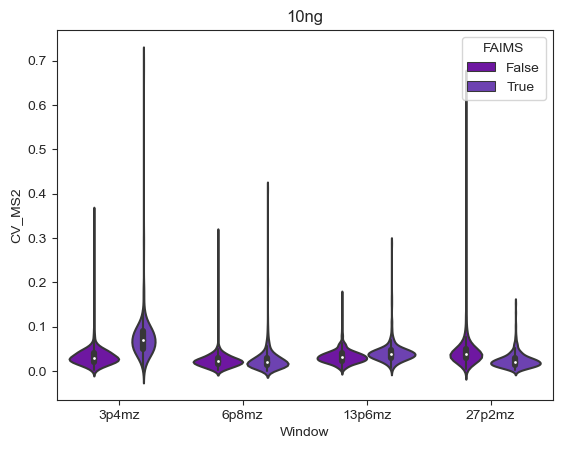

In [10]:
myOrder = ['3p4mz', '6p8mz', '13p6mz', '27p2mz']
sns.violinplot(data=quant_peptides.loc[quant_peptides.Load == '10ng'], x="Window", y="CV_MS2", hue="FAIMS", palette = myColors[:2], order = myOrder).set(title = '10ng')

[Text(0.5, 1.0, '1ng')]

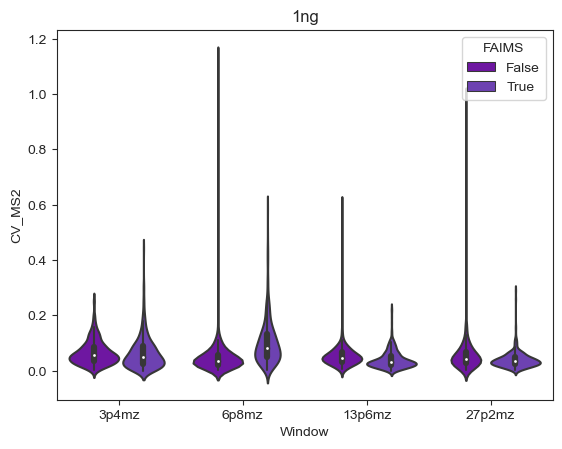

In [11]:
myOrder = ['3p4mz', '6p8mz', '13p6mz', '27p2mz']
sns.violinplot(data=quant_peptides.loc[quant_peptides.Load == '1ng'], x="Window", y="CV_MS2", hue="FAIMS", palette = myColors[:2], order = myOrder).set(title = '1ng')

[Text(0.5, 1.0, '500pg')]

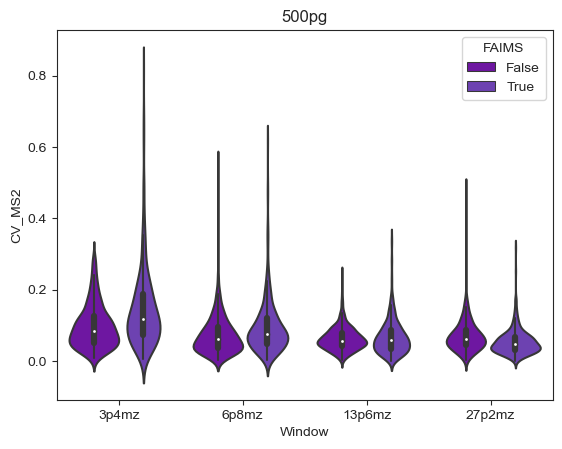

In [12]:
myOrder = ['3p4mz', '6p8mz', '13p6mz', '27p2mz']
sns.violinplot(data=quant_peptides.loc[quant_peptides.Load == '500pg'], x="Window", y="CV_MS2", hue="FAIMS", palette = myColors[:2], order = myOrder).set(title = '500pg')

[Text(0.5, 1.0, '250pg')]

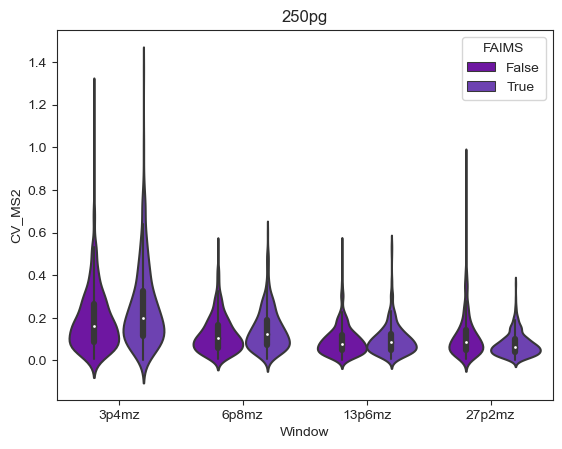

In [13]:
myOrder = ['3p4mz', '6p8mz', '13p6mz', '27p2mz']
sns.violinplot(data=quant_peptides.loc[quant_peptides.Load == '250pg'], x="Window", y="CV_MS2", hue="FAIMS", palette = myColors[:2], order = myOrder).set(title = '250pg')

### MS1 CVs

[Text(0.5, 1.0, '10ng')]

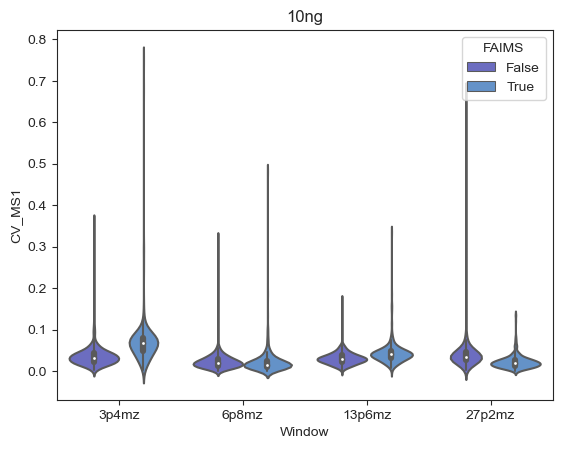

In [14]:
myOrder = ['3p4mz', '6p8mz', '13p6mz', '27p2mz']
sns.violinplot(data=quant_peptides.loc[quant_peptides.Load == '10ng'], x="Window", y="CV_MS1", hue="FAIMS", palette = myColors[2:], order = myOrder).set(title = '10ng')

[Text(0.5, 1.0, '1ng')]

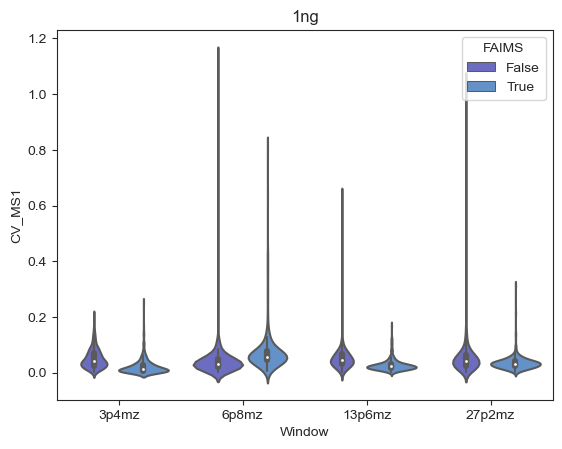

In [15]:
myOrder = ['3p4mz', '6p8mz', '13p6mz', '27p2mz']
sns.violinplot(data=quant_peptides.loc[quant_peptides.Load == '1ng'], x="Window", y="CV_MS1", hue="FAIMS", palette = myColors[2:], order = myOrder).set(title = '1ng')

[Text(0.5, 1.0, '500pg')]

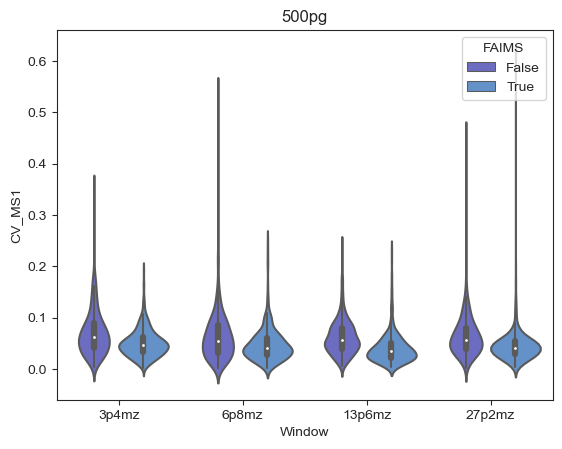

In [16]:
myOrder = ['3p4mz', '6p8mz', '13p6mz', '27p2mz']
sns.violinplot(data=quant_peptides.loc[quant_peptides.Load == '500pg'], x="Window", y="CV_MS1", hue="FAIMS", palette = myColors[2:], order = myOrder).set(title = '500pg')

[Text(0.5, 1.0, '250pg')]

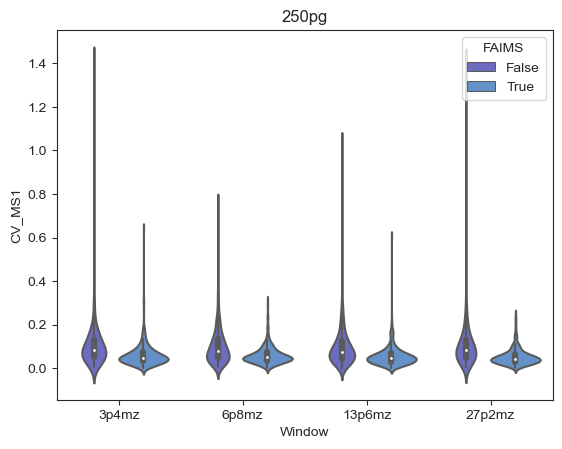

In [17]:
myOrder = ['3p4mz', '6p8mz', '13p6mz', '27p2mz']
sns.violinplot(data=quant_peptides.loc[quant_peptides.Load == '250pg'], x="Window", y="CV_MS1", hue="FAIMS", palette = myColors[2:], order = myOrder).set(title = '250pg')

[Text(0.5, 1.0, '250pg')]

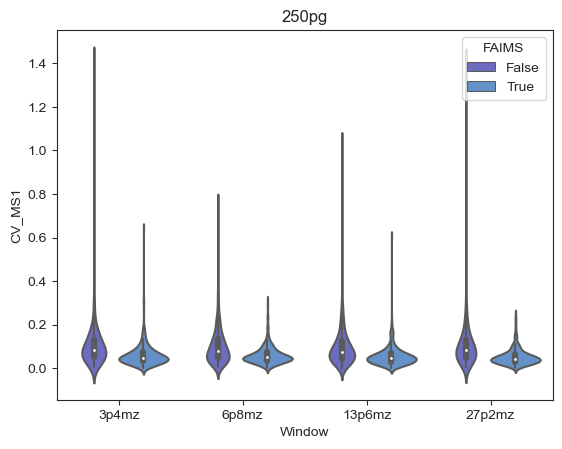

In [18]:
myOrder = ['3p4mz', '6p8mz', '13p6mz', '27p2mz']
sns.violinplot(data=quant_peptides.loc[quant_peptides.Load == '250pg'], x="Window", y="CV_MS1", hue="FAIMS", palette = myColors[2:], order = myOrder).set(title = '250pg')

## Check if the overall peptide intensities are proportional

Need to split the data basaed on injection time as otherwise the quant will be distorted for some precursors 

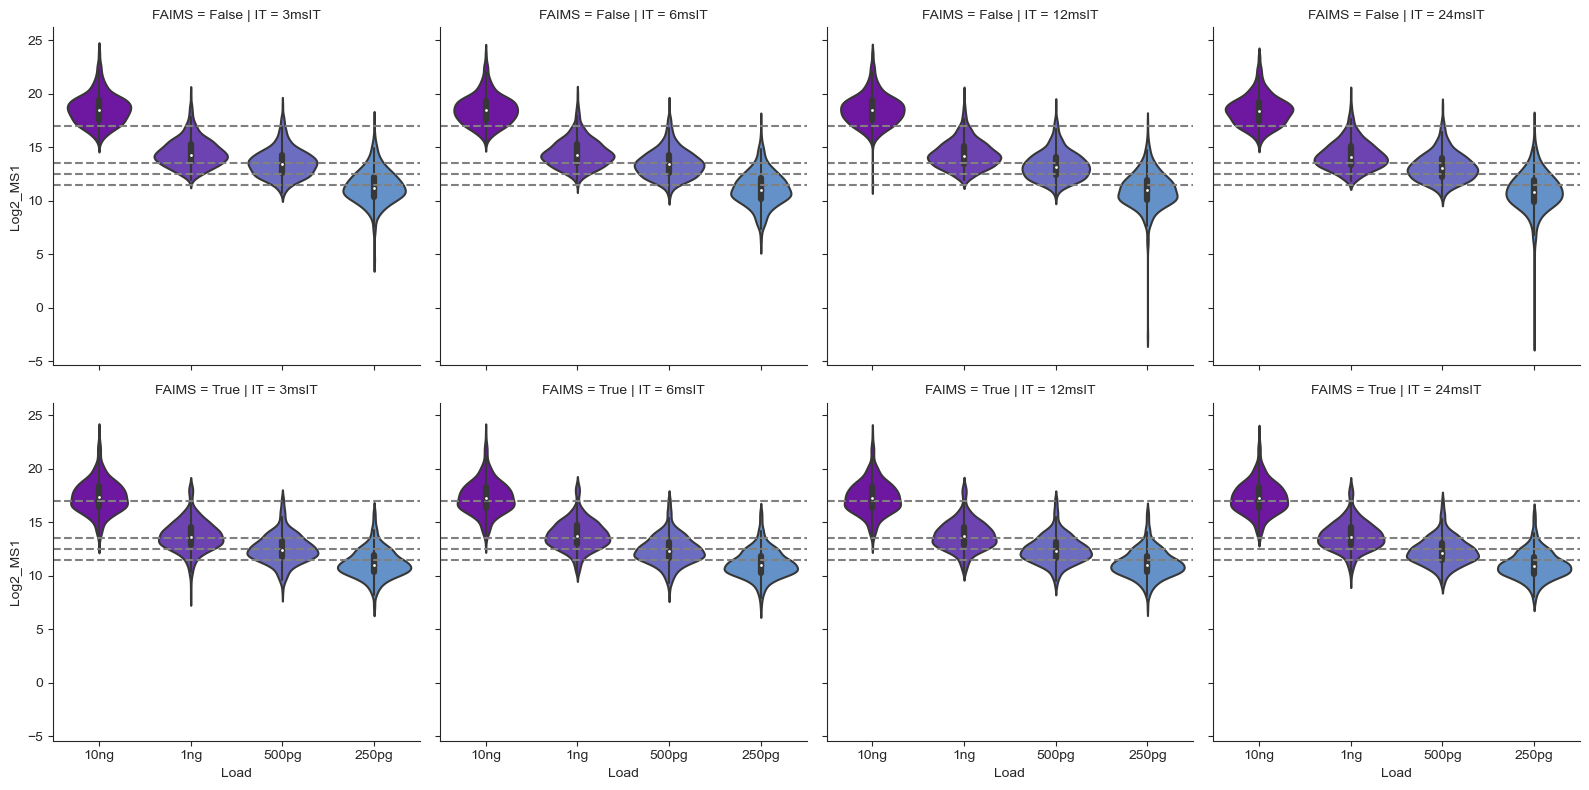

In [19]:
#Extract only the peptides that are found in all conditions 
found_in_all = (merged_df['PEP.GroupingKey'].value_counts() == 32).reset_index()
found_in_all = found_in_all[found_in_all['PEP.GroupingKey'] == True]['index'].values
all_df = merged_df[merged_df['PEP.GroupingKey'].isin(found_in_all)]

all_df.groupby(['Load', 'IT', 'FAIMS'])['FAIMS'].value_counts()


fig = sns.catplot(
    data=all_df, x="Load", y="Log2_MS1", row="FAIMS", col='IT', kind="violin", height=4, 
    order= ['10ng', '1ng', '500pg', '250pg'],  col_order = ['3msIT', '6msIT', '12msIT', '24msIT'], palette = myColors[0:])

fig.refline(y=[17])
fig.refline(y=[13.5])
fig.refline(y=[12.5])
fig.refline(y=[11.5])

#sns.catplot(
#    data=all_df, x="Load", y="Log2_MS2", row="FAIMS", col='IT', kind="violin", height=4, 
#    order= ['10ng', '1ng', '500pg', '250pg'],  col_order = ['3msIT', '6msIT', '12msIT', '24msIT'], palette = myColors[0:])

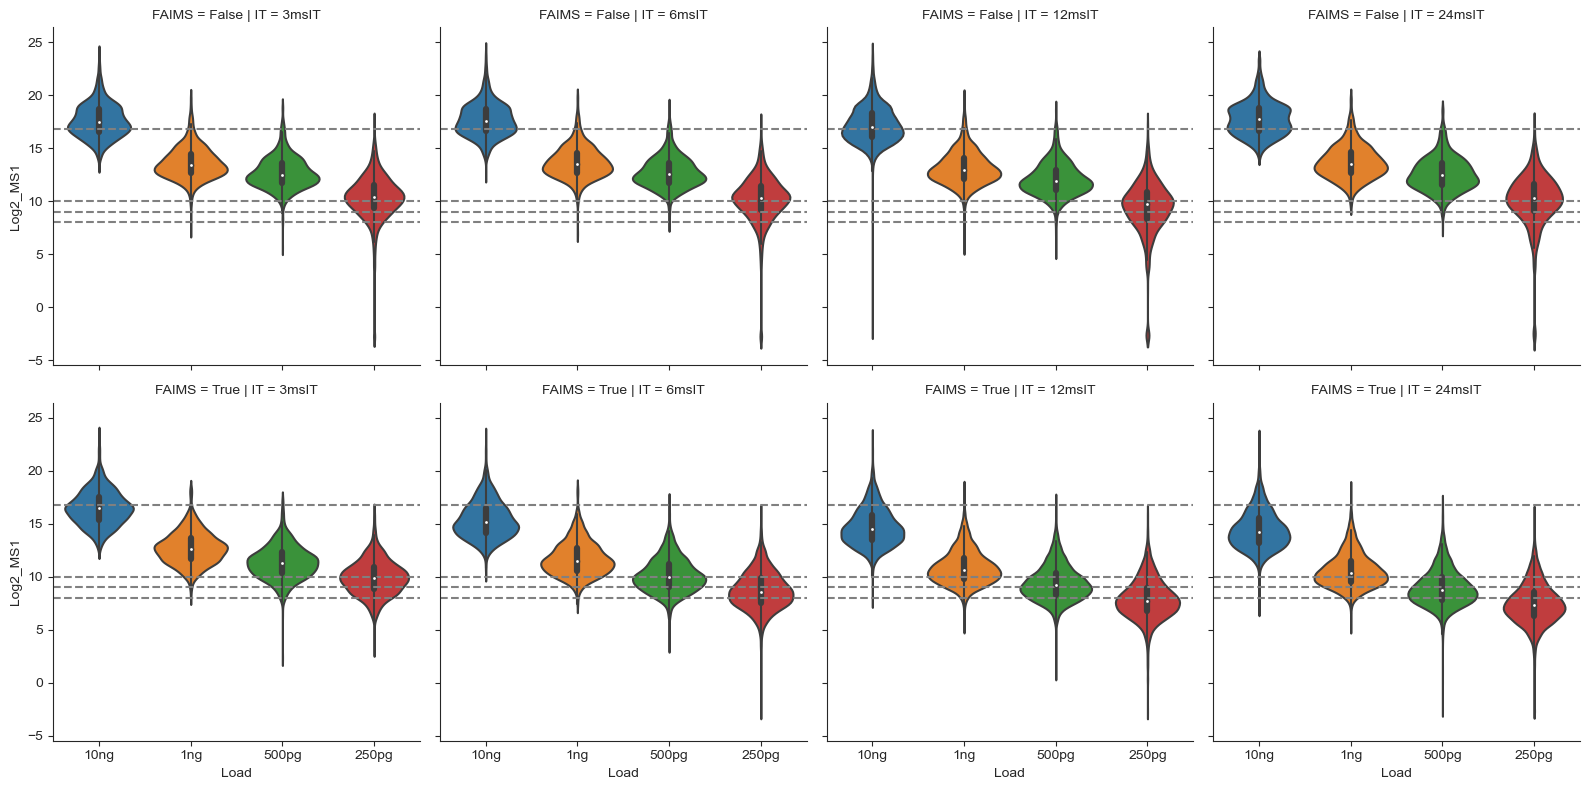

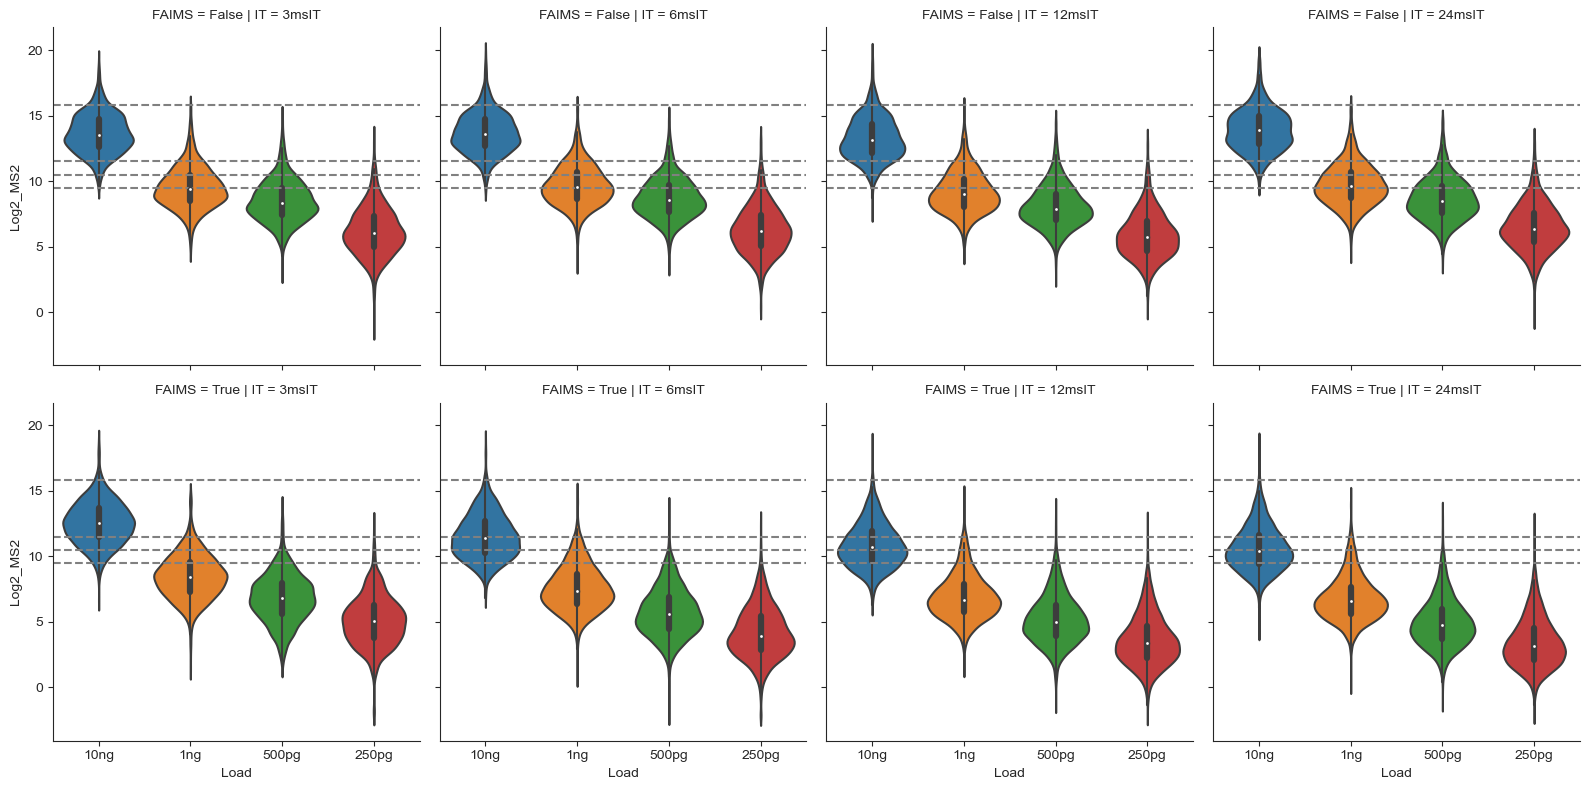

In [20]:
#Extract only the peptides that are found in all conditions 
#found_in_all = (merged_df['PEP.GroupingKey'].value_counts() == 32).reset_index()
#found_in_all = found_in_all[found_in_all['PEP.GroupingKey'] == True]['index'].values
#all_df = merged_df[merged_df['PEP.GroupingKey'].isin(found_in_all)]
#
#all_df.groupby(['Load', 'IT', 'FAIMS'])['FAIMS'].value_counts()

byCondition = pd.DataFrame(merged_df.groupby(['IT', 'FAIMS'])['PEP.GroupingKey'].value_counts() == 4)

byCondition.columns = ['Found']

byCondition = byCondition.reset_index()

condition_df = merged_df.merge(byCondition, on = ['FAIMS', 'IT', 'PEP.GroupingKey'])
fig = sns.catplot(
    data=condition_df[condition_df.Found == True], x="Load", y="Log2_MS1", row="FAIMS", col='IT', kind="violin", height=4, 
    order= ['10ng', '1ng', '500pg', '250pg'],  col_order = ['3msIT', '6msIT', '12msIT', '24msIT'])

fig.refline(y=[16.8])
fig.refline(y=[10.])
fig.refline(y=[9])
fig.refline(y=[8])
fig = sns.catplot(
    data=condition_df[condition_df.Found == True], x="Load", y="Log2_MS2", row="FAIMS", col='IT', kind="violin", height=4, 
    order= ['10ng', '1ng', '500pg', '250pg'],  col_order = ['3msIT', '6msIT', '12msIT', '24msIT'])

fig.refline(y=[15.8])
fig.refline(y=[11.5])
fig.refline(y=[10.5])
fig.refline(y=[9.5])

## Calculating the error

In [21]:
#condition_df.to_csv('data/Exp1/output/quant_df.txt', sep = "\t", index = False)